# [DataCamp Course](https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python)

## Generate a Classification-tree in scikit-learn

In [1]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#Import train_test_split
from sklearn.model_selection import train_test_split
#Import accuracy_score
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
url = 'indian_liver_patient_preprocessed.csv'
data = pd.read_csv(url, index_col=0)

In [4]:
data.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [5]:
X = data.drop(labels=['Total_Bilirubin_std',
                      'Liver_disease',
                     'Direct_Bilirubin_std',
                     'Alkaline_Phosphotase_std',
                     'Alamine_Aminotransferase_std',
                     'Aspartate_Aminotransferase_std',
                     'Albumin_std',
                     'Albumin_and_Globulin_Ratio_std',
                     'Is_male_std'], axis=1)
y = data.Liver_disease

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 2 columns):
Age_std               579 non-null float64
Total_Protiens_std    579 non-null float64
dtypes: float64(2)
memory usage: 13.6 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)

In [8]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [9]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.6724137931034483

## Decision Regions
region in the feature space where all instances are assigned to one class label
## Decision Boundary
surface separating different decision regions

In [10]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 1 1]


In [11]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.66


## Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [12]:
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
                              """Plot decision regions of a classifier.
                          
                              Please note that this functions assumes that class labels are
                              labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
                              labels with integer labels > 4, you may want to provide additional colors
                              and/or markers as `colors` and `markers` arguments.
                              See http://matplotlib.org/examples/color/named_colors.html for more
                              information.
                          
                              Parameters
                              ----------
                              X : array-like, shape = [n_samples, n_features]
                                  Feature Matrix.
                              y : array-like, shape = [n_samples]
                                  True class labels.
                              clf : Classifier object.
                                  Must have a .predict method.
                              feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
                                  Feature indices to use for plotting. The first index in
                                  `feature_index` will be on the x-axis, the second index will be
                                  on the y-axis.
                              filler_feature_values : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted.
                              filler_feature_ranges : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted. Will use the
                                  ranges provided to select training samples for plotting.
                              ax : matplotlib.axes.Axes (default: None)
                                  An existing matplotlib Axes. Creates
                                  one if ax=None.
                              X_highlight : array-like, shape = [n_samples, n_features] (default: None)
                                  An array with data points that are used to highlight samples in `X`.
                              res : float or array-like, shape = (2,) (default: 0.02)
                                  Grid width. If float, same resolution is used for both the x- and
                                  y-axis. If array-like, the first item is used on the x-axis, the
                                  second is used on the y-axis. Lower values increase the resolution but
                                  slow down the plotting.
                              hide_spines : bool (default: True)
                                  Hide axis spines if True.
                              legend : int (default: 1)
                                  Integer to specify the legend location.
                                  No legend if legend is 0.
                              markers : str (default \'s^oxv<>\')
                                  Scatterplot markers.
                              colors : str (default \'red,blue,limegreen,gray,cyan\')
                                  Comma separated list of colors.
                          
                              Returns
                              ---------
                              ax : matplotlib.axes.Axes object
                          
                              """
                          
                              # check_Xy(X, y, y_int=True)  # Validate X and y arrays
                              dim = X.shape[1]
                          
                              if ax is None:
                                  ax = plt.gca()
                          
                              if isinstance(res, float):
                                  xres, yres = res, res
                              else:
                                  try:
                                      xres, yres = res
                                  except ValueError:
                                      raise ValueError('Unable to unpack res. Expecting \
                                                       array-like input of length 2.')
                          
                              plot_testdata = True
                              if not isinstance(X_highlight, np.ndarray):
                                  if X_highlight is not None:
                                      raise ValueError('X_highlight must be a NumPy array or None')
                                  else:
                                      plot_testdata = False
                              elif len(X_highlight.shape) < 2:
                                  raise ValueError('X_highlight must be a 2D array')
                          
                              if feature_index is not None:
                                  # Unpack and validate the feature_index values
                                  if dim == 1:
                                      raise ValueError(
                                          'feature_index requires more than one training feature')
                                  try:
                                      x_index, y_index = feature_index
                                  except ValueError:
                                      raise ValueError(
                                          'Unable to unpack feature_index. Make sure feature_index \
                                          only has two dimensions.')
                                  try:
                                      X[:, x_index], X[:, y_index]
                                  except IndexError:
                                      raise IndexError(
                                          'feature_index values out of range. X.shape is {}, but \
                                          feature_index is {}'.format(X.shape, feature_index))
                              else:
                                  feature_index = (0, 1)
                                  x_index, y_index = feature_index
                          
                              # Extra input validation for higher number of training features
                              if dim > 2:
                                  if filler_feature_values is None:
                                      raise ValueError('Filler values must be provided when \
                                                       X has more than 2 training features.')
                          
                                  if filler_feature_ranges is not None:
                                      if not set(filler_feature_values) == set(filler_feature_ranges):
                                          raise ValueError(
                                              'filler_feature_values and filler_feature_ranges must \
                                              have the same keys')
                          
                                  # Check that all columns in X are accounted for
                                  column_check = np.zeros(dim, dtype=bool)
                                  for idx in filler_feature_values:
                                      column_check[idx] = True
                                  for idx in feature_index:
                                      column_check[idx] = True
                                  if not all(column_check):
                                      missing_cols = np.argwhere(~column_check).flatten()
                                      raise ValueError(
                                          'Column(s) {} need to be accounted for in either \
                                          feature_index or filler_feature_values'.format(missing_cols))
                          
                              marker_gen = cycle(list(markers))
                          
                              n_classes = np.unique(y).shape[0]
                              colors = colors.split(',')
                              colors_gen = cycle(colors)
                              colors = [next(colors_gen) for c in range(n_classes)]
                          
                              # Get minimum and maximum
                              x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
                              if dim == 1:
                                  y_min, y_max = -1, 1
                              else:
                                  y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1
                          
                              xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                                                   np.arange(y_min, y_max, yres))
                          
                              if dim == 1:
                                  X_predict = np.array([xx.ravel()]).T
                              else:
                                  X_grid = np.array([xx.ravel(), yy.ravel()]).T
                                  X_predict = np.zeros((X_grid.shape[0], dim))
                                  X_predict[:, x_index] = X_grid[:, 0]
                                  X_predict[:, y_index] = X_grid[:, 1]
                                  if dim > 2:
                                      for feature_idx in filler_feature_values:
                                          X_predict[:, feature_idx] = filler_feature_values[feature_idx]
                              Z = clf.predict(X_predict)
                              Z = Z.reshape(xx.shape)
                              # Plot decisoin region
                              ax.contourf(xx, yy, Z,
                                          alpha=0.3,
                                          colors=colors,
                                          levels=np.arange(Z.max() + 2) - 0.5)
                          
                              ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
                          
                              # Scatter training data samples
                              for idx, c in enumerate(np.unique(y)):
                                  if dim == 1:
                                      y_data = [0 for i in X[y == c]]
                                      x_data = X[y == c]
                                  elif dim == 2:
                                      y_data = X[y == c, y_index]
                                      x_data = X[y == c, x_index]
                                  elif dim > 2 and filler_feature_ranges is not None:
                                      class_mask = y == c
                                      feature_range_mask = get_feature_range_mask(
                                                      X, filler_feature_values=filler_feature_values,
                                                      filler_feature_ranges=filler_feature_ranges)
                                      y_data = X[class_mask & feature_range_mask, y_index]
                                      x_data = X[class_mask & feature_range_mask, x_index]
                                  else:
                                      continue
                          
                                  ax.scatter(x=x_data,
                                             y=y_data,
                                             alpha=0.8,
                                             c=colors[idx],
                                             marker=next(marker_gen),
                                             edgecolor='black',
                                             label=c)
                          
                              if hide_spines:
                                  ax.spines['right'].set_visible(False)
                                  ax.spines['top'].set_visible(False)
                                  ax.spines['left'].set_visible(False)
                                  ax.spines['bottom'].set_visible(False)
                              ax.yaxis.set_ticks_position('left')
                              ax.xaxis.set_ticks_position('bottom')
                              if dim == 1:
                                  ax.axes.get_yaxis().set_ticks([])
                          
                              if legend:
                                  if dim > 2 and filler_feature_ranges is None:
                                      pass
                                  else:
                                      handles, labels = ax.get_legend_handles_labels()
                                      ax.legend(handles, labels,
                                                framealpha=0.3, scatterpoints=1, loc=legend)
                          
                              if plot_testdata:
                                  if dim == 1:
                                      x_data = X_highlight
                                      y_data = [0 for i in X_highlight]
                                  elif dim == 2:
                                      x_data = X_highlight[:, x_index]
                                      y_data = X_highlight[:, y_index]
                                  else:
                                      feature_range_mask = get_feature_range_mask(
                                              X_highlight, filler_feature_values=filler_feature_values,
                                              filler_feature_ranges=filler_feature_ranges)
                                      y_data = X_highlight[feature_range_mask, y_index]
                                      x_data = X_highlight[feature_range_mask, x_index]
                          
                                  ax.scatter(x_data,
                                             y_data,
                                             c='',
                                             edgecolor='black',
                                             alpha=1.0,
                                             linewidths=1,
                                             marker='o',
                                             s=80)
                          
                              return ax


In [13]:
def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
    if i == 0:
        ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
        plt.tight_layout()
        plt.show()

In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('seaborn-whitegrid')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


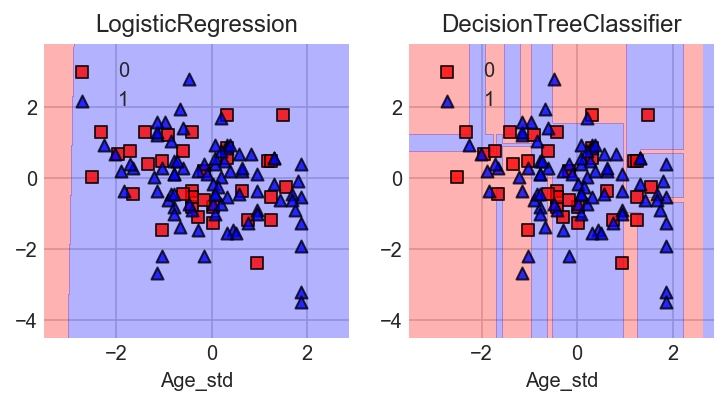

In [17]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Decision-Tree

Data structure consisting of a hierarchy of nodes

## Node

question or prediction

## Root

_no_ parent node, question giving rise to _two_ children nodes

## Internal node

_one_ parent node, question giving rise to _two_ children nodes

## Leaf

_one_ parent node, _no_ children nodes. This is where predictions are made

## Information Gain (IG)

How does the algorithm know which feature and which split-point to choose? It does so by maximizing information gain. The tree considers that each node contains information and aims at maximizing the information gain after each split. 

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- When an internal node is split, the split is performed in such a way so that information gain is maximized.

In [20]:
breast_cancer = pd.read_csv('wbc.csv', index_col=0)

In [21]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
y = breast_cancer.diagnosis

In [24]:
mapping = {'M':1, 'B':0}

In [26]:
y = y.map(mapping)

In [27]:
X = breast_cancer.drop('diagnosis', axis=1)

In [31]:
X = X.iloc[:, :30]

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se             

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [35]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [37]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

y_pred_g = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_pred_g, y_test)

In [38]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


# [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)